# D&A Basic 6주차 실습

## 시각화

In [1]:
# 시각화 패키지
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 필요한 패키지
import numpy as np
import warnings
warnings.simplefilter('ignore')

In [2]:
# 한글 폰트 설정
from matplotlib import font_manager, rc
import platform

your_os = platform.system()
if your_os == 'Linux':
    rc('font', family = 'NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family = font_name)
elif your_os == 'Darwin':
    rc('font', family = 'AppleGothic')
rc('axes', unicode_minus = False)

In [3]:
# 붓꽃 데이터
iris = sns.load_dataset("iris")
display(iris.head())

# 타이타닉호 데이터
titanic = sns.load_dataset("titanic")
display(titanic.head())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## pandas

- pandas의 DataFrame,Series는 `.plot()` 메서드를 통해 시각화 가능
- 해당 메서드에서 내부적으로 matplotlib을 가져와 사용

``` python
DF.plot.유형()
DF.plot(kind ='유형')
```

```python
import pandas as pd

# plot.종류()
DF.plot.유형()

# plot(kind= '종류')
DF.plot(kind= '유형')

# 종류
# line(default), bar, barh, hist, pie, box, kde, density, area, scatter(DataFrame only), hexbin(DataFrame only)

```
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot

### 1) 유형

####  Line plot

- 수치의 변화를 확인할 때 사용
- 순서나 추세를 보여주기 좋음
- ex. 월별 감수량 변화, 년도별 인구 수, ...


```python
>>> .plot()

>>> .plot.line()

>>> .plot(kind = 'line')
```

<Axes: >

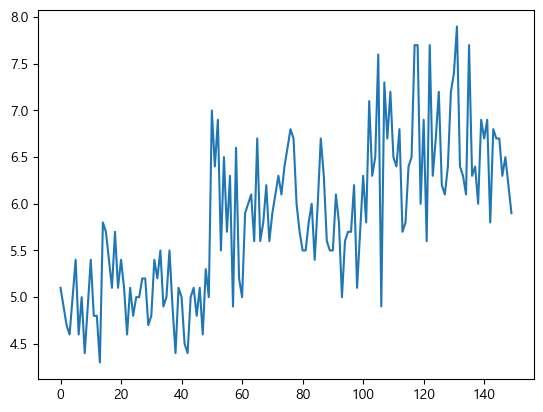

In [4]:
iris['sepal_length'].plot()
#plt.show() #실행 결과 문구 삭제 

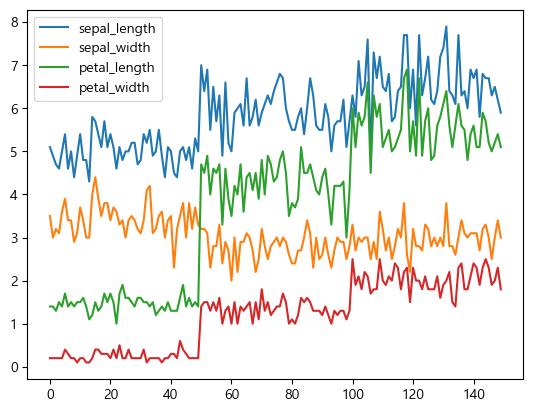

In [5]:
iris.plot.line()
plt.show()

``` python
iris.plot(kind = 'line', subplots = True)
```

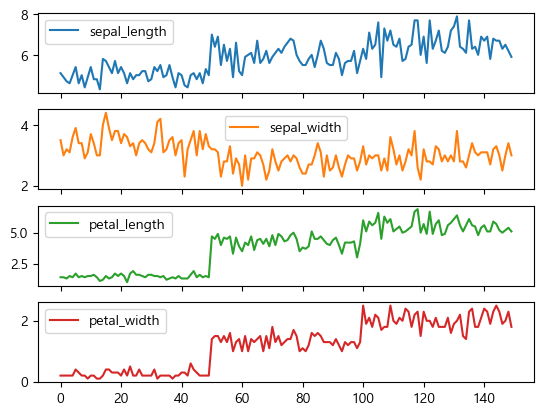

In [6]:
# subplots = True : 각 column에 대해 그래프 따로 그리기
iris.plot(kind = 'line', subplots = True)
plt.show()

#### Bar plot

- 수치형 데이터를 비교할 때 사용
- ex. 지역별 인구수, ...

```python
>>> .plot.bar()

>>> .plot(kind = 'bar')
```

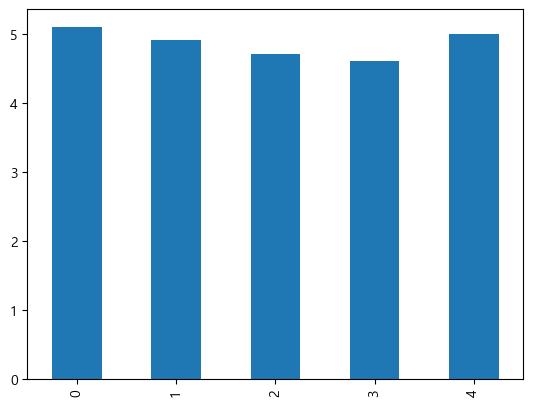

In [7]:
iris['sepal_length'][:5].plot.bar()
plt.show()

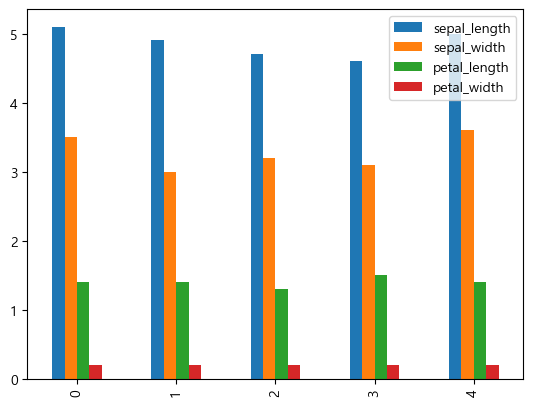

In [8]:
iris[:5].plot.bar()
plt.show()

``` python
iris[:5].plot(kind = 'bar', stacked = True)
```

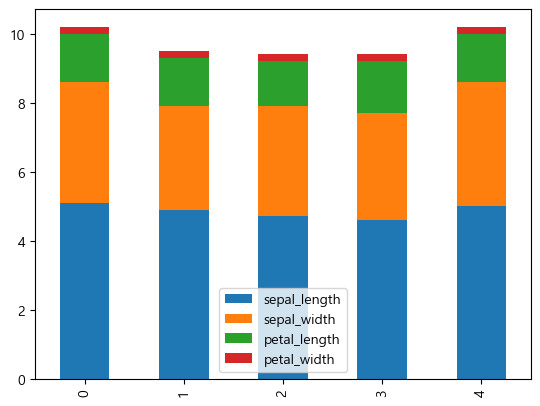

In [9]:
# stacked = True : 누적 막대 그래프 그리기
iris[:5].plot(kind = 'bar', stacked = True)
plt.show()

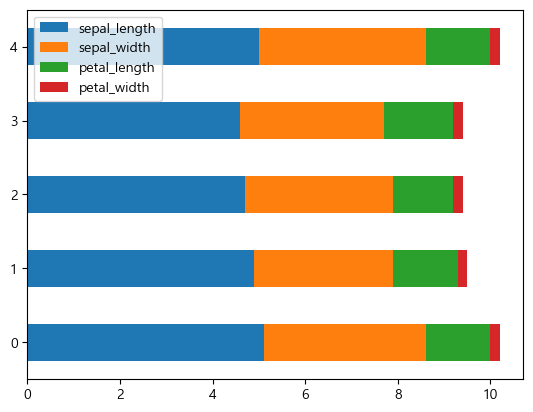

In [10]:
# 수평 막대 그래프
iris[:5].plot(kind = 'barh', stacked = True)
plt.show()

#### Histogram

- 데이터의 분포를 확인할 때 사용
- ex. 시험 성적, ...

```python
>>> .plot.hist()

>>> .plot(kind = 'hist')
```

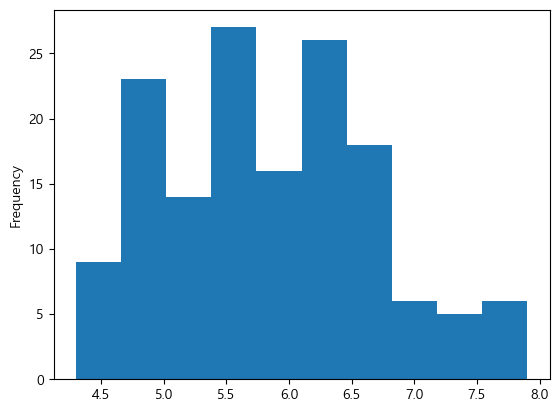

In [11]:
iris['sepal_length'].plot.hist()
plt.show()

``` python
iris['sepal_length'].plot(kind ='hist', bins = 40)
```

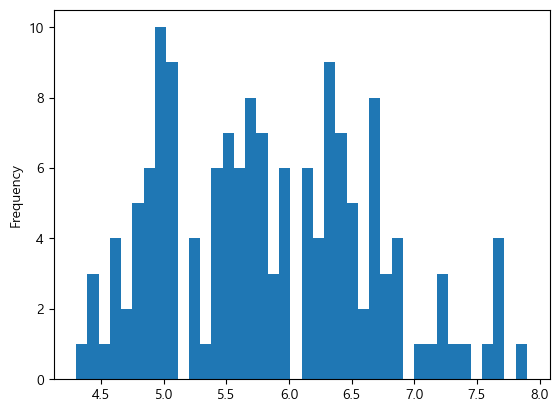

In [12]:
# bins = 정수 : 가로축 구간의 개수 (default=10)
iris['sepal_length'].plot(kind ='hist', bins = 40)
plt.show()

#### Pie plot
- 범주형 데이터의 범주를 비교할 때 사용
- 어느 항목이 어느 비율 차지하는지
- ex. 지역 인구 수의 각 연령대 비율

```python
>>> .plot.pie()

>>> .plot(kind = 'pie')
```

In [13]:
titanic.pclass.value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

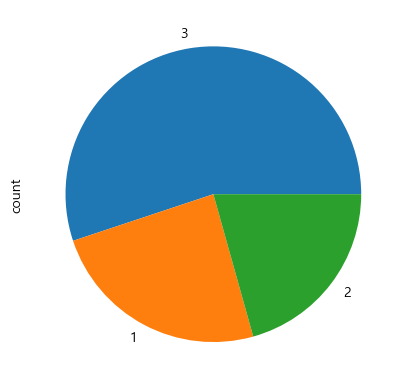

In [14]:
titanic.pclass.value_counts().plot.pie()
plt.show()

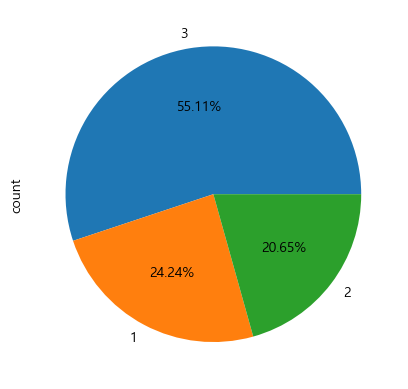

In [15]:
# autopct = '%.자릿수f%%' : 그래프 내에 비율 표시

titanic.pclass.value_counts().plot(kind = 'pie', autopct = '%.2f%%')
plt.show()

``` python
titanic.pclass.value_counts().plot(kind ='pie', autopct = '%.2f%%', explode = [0, 0, 0.3])
```

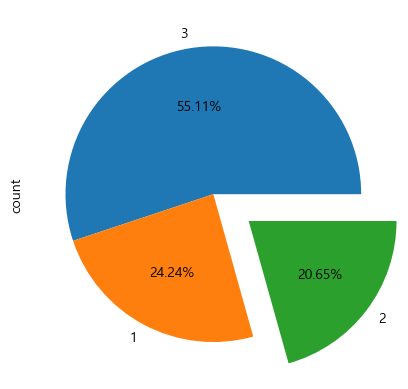

In [16]:
# explode = 리스트 : 부채꼴이 중심에서 벗어나는 정도
titanic.pclass.value_counts().plot(kind ='pie', autopct = '%.2f%%', explode = [0, 0, 0.3])
plt.show()

#### Scatter plot
- 두 변수 간의 상관관계를 확인할 때 사용 (DataFrame only)
- 점의 크기 / 색상을 통해 3가지 이상의 데이터 표현 가능(= Bubble Chart)
- ex. 키와 몸무게의 관계, ...

```python
>>> .plot.scatter(x, y)

>>> .plot(x, y, kind = 'scatter')
```



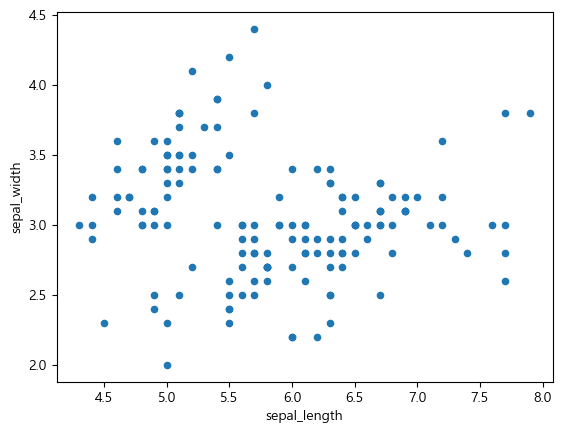

In [17]:
iris.plot.scatter(x = 'sepal_length', y = 'sepal_width')
plt.show()

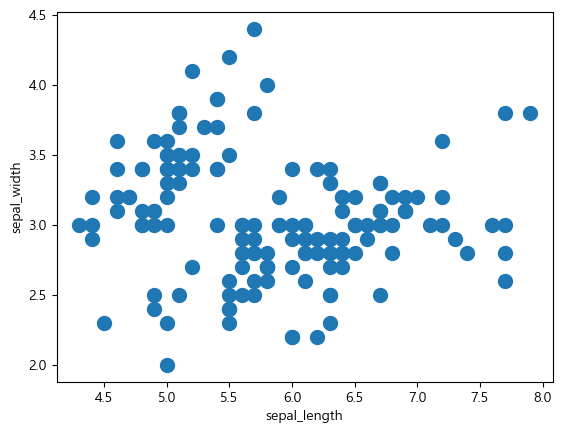

In [18]:
# s : size(scalar : 단일 사이즈, column_name : 해당 열의 값을 사이즈로 사용)
iris.plot(kind = 'scatter', x = 'sepal_length', y = 'sepal_width', s = 100 )
plt.show()

``` python
iris.plot(kind = 'scatter', x = 'sepal_length', y = 'sepal_width', s = 'petal_length')
```

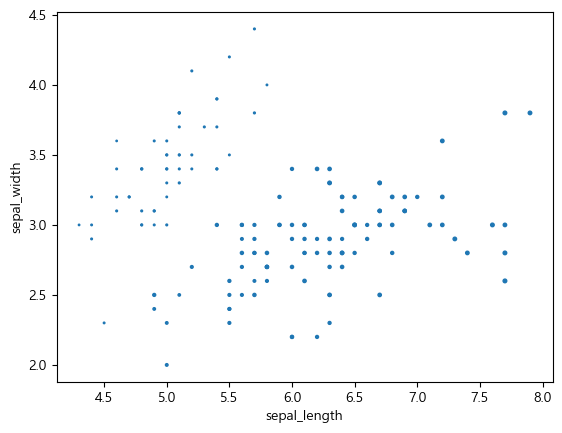

In [19]:
iris.plot(kind = 'scatter', x = 'sepal_length', y = 'sepal_width', s = 'petal_length')
plt.show()

``` python 
import matplotlib.pyplot as plt
plt.유형()
```

## matplotlib

- matplotlib.pyplot의 함수를 통해 시각화 가능
- 그래프 관련 설정(꾸미기) 가능

```python
import matplotlib.pyplot as plt

# plt.종류()
plt.plot()

# 종류
# plot, bar, hist, pie, scatter, boxplot, ...

```

https://matplotlib.org/stable/plot_types/index

### 1) 유형

Line plot
```python
>>> plt.plot(x, y, linestyle, linewidth, marker, color, label)
```

Bar plot
```python
>>> plt.bar(x, height, width)
>>> plt.barh(x, width, height)
```

Histogram
```python
>>> plt.hist(x, bins)
```

Pie plot
```python
>>> plt.pie(x, labels, autopct, explode)
```

Scatter plot
```python
>>> plt.scatter(x, y, marker)
```

Box plot
```python
>>> plt.boxplot(x)
```

### Line plot

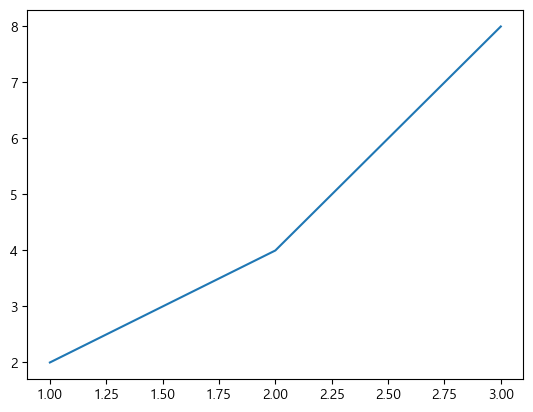

In [20]:
x = [1,2,3]
y = [2,4,8]

plt.plot(x,y)
plt.show()

#### (1) 그래프 사이즈

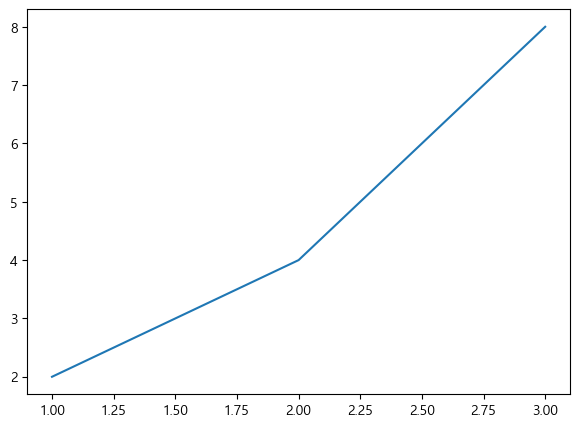

In [21]:
# 그래프 크기
# figsize = (가로,세로)
plt.figure(figsize = (7,5))

# 그래프
plt.plot(x,y)

plt.show()

#### (2) title 

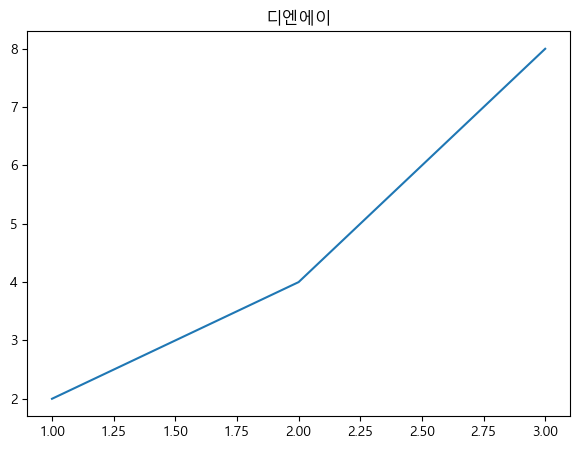

In [22]:
# 그래프 크기 
plt.figure(figsize = (7,5))

# 그래프
plt.plot(x,y)

# 그래프 제목
plt.title('디엔에이') #fontdict={'family':'Hancom Hoonminjeongeum_H', 'size':20}

plt.show()

In [23]:
# 사용 가능한 폰트 확인
import matplotlib.font_manager as fm 
fm.fontManager.ttflist
[f.name for f in fm.fontManager.ttflist] 

['DejaVu Sans',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'DejaVu Serif',
 'STIXSizeOneSym',
 'STIXSizeFiveSym',
 'DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'cmss10',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'STIXGeneral',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'DejaVu Serif Display',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'STIXGeneral',
 'cmr10',
 'cmmi10',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'STIXGeneral',
 'DejaVu Sans Display',
 'DejaVu Serif',
 'STIXSizeOneSym',
 'STIXNonUnicode',
 'cmtt10',
 'DejaVu Sans',
 'STIXNonUnicode',
 'STIXSizeFourSym',
 'cmex10',
 'DejaVu Serif',
 'cmb10',
 'cmsy10',
 'STIXSizeFourSym',
 'Corbel',
 'Palatino Linotype',
 'HancomEQN',
 'Gabriola',
 'Yu Gothic',
 'Yu Gothic',
 'Arial',
 'Segoe Script',
 'HCR Batang ExtB',
 'Segoe MDL2 Assets',
 'Georgia',
 'Segoe Print',
 'HyhwpEQ',
 'Sitka',
 'Trebuchet MS',
 'Franklin Gothic Medium',
 'Malgun Gothic',
 'HCR Batang',
 'Trebuchet MS',
 'Candara',
 'Microsoft JhengHei',
 'LG S

#### (3) 축

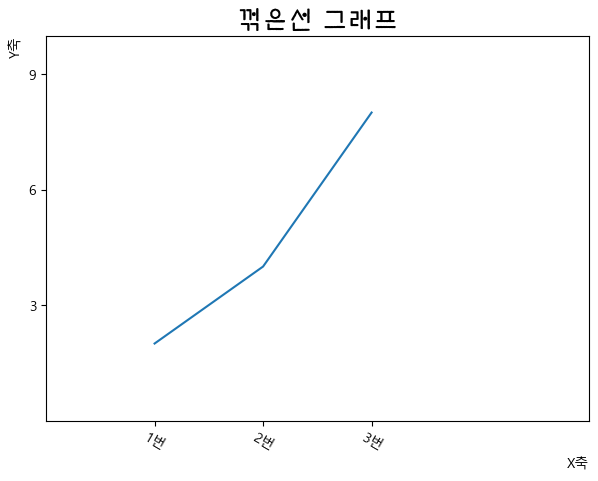

In [24]:
# 그래프 크기
plt.figure(figsize = (7,5))

# 그래프
plt.plot(x,y)

# 그래프 제목
plt.title('꺾은선 그래프', fontdict={'family':'Hancom Hoonminjeongeum_H', 'size':20})

# 축 라벨
plt.xlabel('X축', loc = 'right') # left, center, right
plt.ylabel('Y축', loc = 'top') #top, center, bottom

# 축 눈금
plt.xticks(ticks = [1,2,3], labels = ['1번','2번','3번'], rotation = -30)
plt.yticks(ticks = [3,6,9])
# rotation = 수 : 입력한 수만큼 회전시켜 표시 (글자가 겹치는 경우 많이 사용)

# 축 범위
plt.xlim(0,5)
plt.ylim(0,10)

plt.show()

#### (4) 범례(legend) 및 그리드

- 범례 : 그래프에서 해당 데이터가 어떤 걸 의미하는지 알려줌

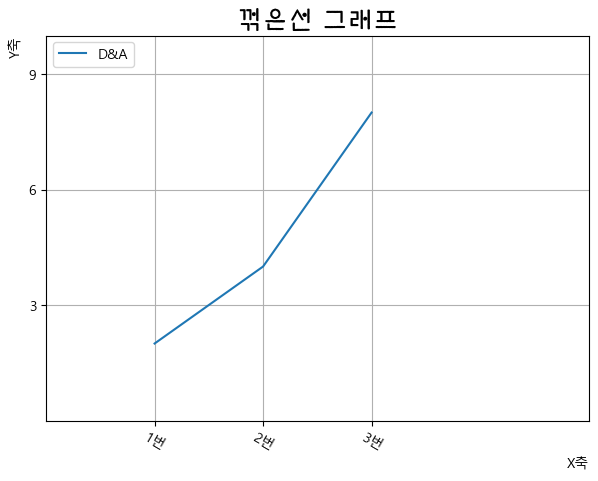

In [25]:
# 그래프 사이즈
plt.figure(figsize = (7,5))

# 그래프
plt.plot(x,y, label = 'D&A')

# 그래프 제목
plt.title('꺾은선 그래프', fontdict={'family':'Hancom Hoonminjeongeum_H', 'size':20})

# 축 라벨
plt.xlabel('X축', loc = 'right') # left, center, right
plt.ylabel('Y축', loc = 'top') #top, center, bottom

# 축 눈금
plt.xticks(ticks = [1,2,3], labels = ['1번','2번','3번'], rotation = -30)
plt.yticks(ticks = [3,6,9])
# rotation = 수 : 입력한 수만큼 회전시켜 표시 (글자가 겹치는 경우 많이 사용)

# 축 범위
plt.xlim(0,5)
plt.ylim(0,10)

# 범례
plt.legend(loc = 'upper left')
#plt.legend(loc = (0.6, 0.4))
# 1) best(default 값), upper left, lower left, lower right, right, center left, center right, lower center, upper center, center
# 2) 좌표값 (x축,y축) 0~1 사이

# 그리드
plt.grid(True)

plt.show()

#### (5) 스타일

``` python
plt.plot(x, y, 'ro-.', lw = 3, ms = 10, mfc = 'yellow', mec = 'green', alpha = 0.5, label = 'D&A')
```

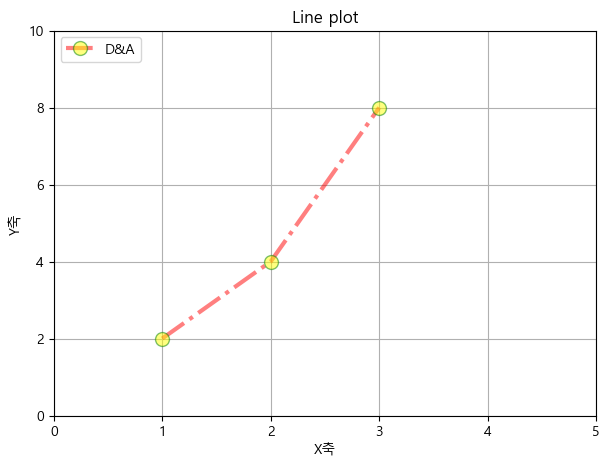

In [26]:
# 그래프 사이즈
plt.figure(figsize = (7,5))

# 그래프
plt.plot(x, y, color = 'red', marker = 'o', linestyle = '-.', linewidth = 3, markersize = 10, markerfacecolor = 'yellow', markeredgecolor = 'green', alpha = 0.5, label = 'D&A')  #alpha : 투명도 (0~1)
#plt.plot(x, y, 'ro-.', lw = 3, ms = 10, mfc = 'yellow', mec = 'green', alpha = 0.5, label = 'D&A') # color, marker, linestyle 순으로 적어야 됨

# 그래프 제목
plt.title('Line plot')

# 축 라벨
plt.xlabel('X축') # left, center, right
plt.ylabel('Y축') #rgb #top, center, bottom

# 축 눈금
#plt.xticks(ticks = [1,2,3], labels = ['1번','2번','3번'], rotation = -30)
#plt.yticks(ticks = [3,6,9])
# rotation = 수 : 입력한 수만큼 회전시켜 표시 (글자가 겹치는 경우 많이 사용)

# 축 범위
plt.xlim(0,5)
plt.ylim(0,10)

# 범례
plt.legend(loc = 'upper left')
#plt.legend(loc = (0.6, 0.4))
# 1) best(default 값), upper left, lower left, lower right, right, center left, center right, lower center, upper center, center
# 2) 좌표값 (x축,y축) 0~1 사이

# 그리드
plt.grid(True)

plt.show()

# 그래프 저장 : plt.savefig('이름.형식')
# plt.savefig('example_plot.png')

##### Marker Style: https://matplotlib.org/stable/api/markers_api.html
##### Line Style: https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
##### Line Color: https://matplotlib.org/stable/gallery/color/named_colors.html

### 2) 여러 그래프 그리기

겹처 그리기 1 ; x축과 y축이 모두 같은 경우


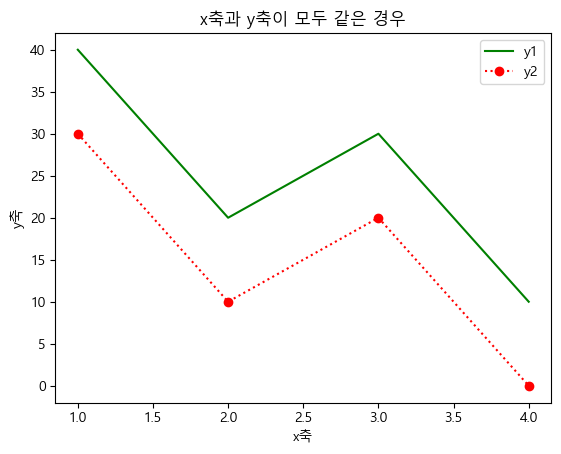

In [27]:
x = [1,2,3,4]
y = [40, 20, 30, 10]

plt.plot(x, y, color = 'green', label = 'y1')
plt.plot(x, [i-10 for i in y], 'ro:', label = 'y2')

plt.title('x축과 y축이 모두 같은 경우')
plt.xlabel('x축')
plt.ylabel('y축')
plt.legend()
plt.show()

겹쳐 그리기 2 ; y축이 다른 경우

```python
fig, ax1 = plt.subplots() # plt.subplots() : 틀 만들기
ax2 = ax1.twinx()         # 같은 x축을 쓰는 twin 만들기
```

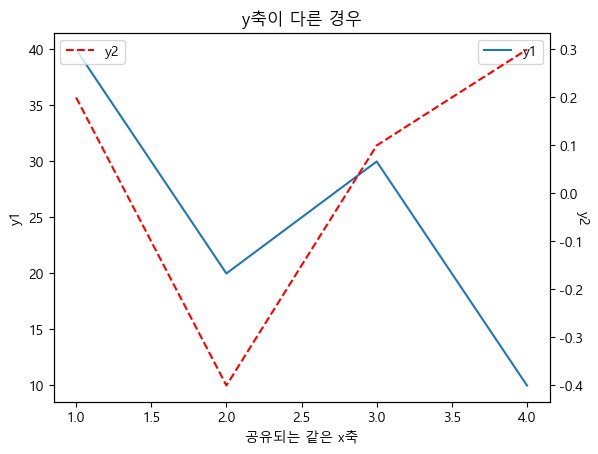

In [28]:
y2 = [0.2, -0.4, 0.1, 0.3]

# figure : 종이 
# Axes : 실제로 데이터를 표시하는 좌표축
fig, ax1 = plt.subplots()
ax1.plot(x, y, label = 'y1')
ax1.set_ylabel('y1')
ax1.legend()

ax2 = ax1.twinx() # ax1과 x축을 공유하는 새로운 축 ax2를 생성
ax2.plot(x, y2, 'r--', label = 'y2')
ax2.set_ylabel('y2', rotation = 270)
ax2.legend()

# 여러 그래프를 그려줄 때에는 .set_@
ax1.set_title('y축이 다른 경우')
ax1.set_xlabel('공유되는 같은 x축')
plt.show()

나란히 그리기 1 ; subplot

```python
>>> plt.subplot(총_행_개수, 총_열_개수, 그래프_번호)
```


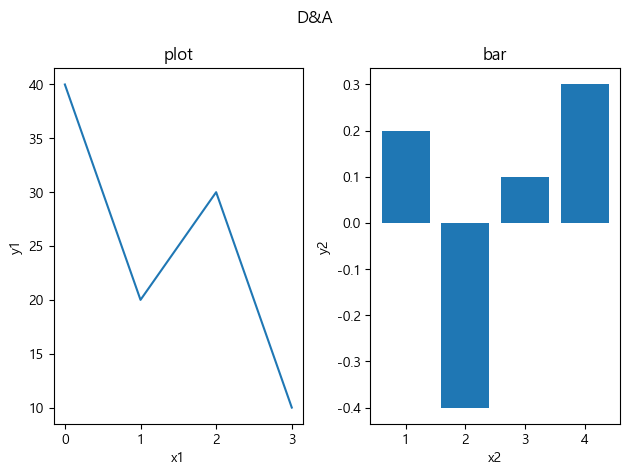

In [29]:
plt.figure()

ax1 = plt.subplot(1,2,1)  # 행 = 1, 열 = 2, 좌우 중 좌
plt.plot(y)
plt.title('plot')
plt.xlabel('x1')
plt.ylabel('y1')

ax2 = plt.subplot(122)  # 행 = 1, 열 = 2, 좌우 중 우
plt.bar(x, y2)
plt.title('bar')
plt.xlabel('x2')
plt.ylabel('y2')

plt.suptitle('D&A')
plt.tight_layout() # 그래프 간 간격 자동 맞춤
plt.show()

나란히 그리기 2 ; subplots
```python
>>> plt.subplots(총_행_개수, 총_열_개수)
```

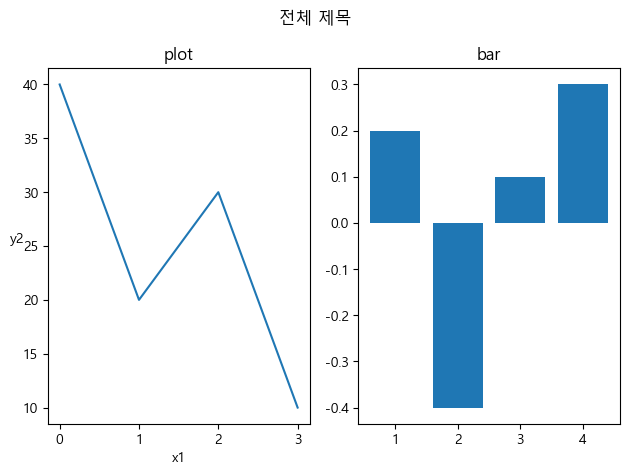

In [30]:
fig , axes = plt.subplots(1,2)  # 행 = 1, 열 = 2

axes[0].plot(y)
axes[0].set_title('plot')
axes[0].set_xlabel('x1')
axes[0].set_ylabel('y2', rotation = 0)

axes[1].bar(x, y2)
axes[1].set_title('bar')

plt.suptitle('전체 제목')

plt.tight_layout()  #그래프 간 간격 자동 맞춤
plt.show()

``` python
import seaborn as sns
sns.유형()
```

## seaborn

- matplotlib 기반의 시각화 라이브러리
- 통계 그래프를 그리기 위한 고급 인터페이스를 제공

```python
import seaborn as sns

# sns.종류()
sns.countplot()

# 종류
# countplot, boxplot, violinplot, lmplot, pairplot, heatmap, ...
```

https://seaborn.pydata.org/examples/index.html


### 1) countplot

- 항목별 개수를 셀 필요가 있을 때 사용
```python
>>> sns.countplot(x, data)
>>> sns.countplot(data.x)
```


In [31]:
titanic.pclass

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: pclass, Length: 891, dtype: int64

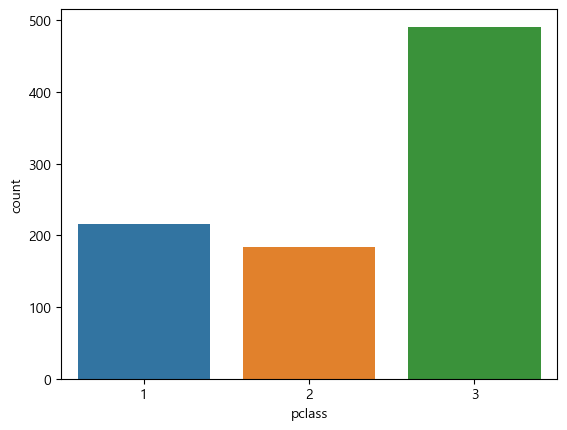

In [32]:
sns.countplot(data = titanic, x = 'pclass')
plt.show()

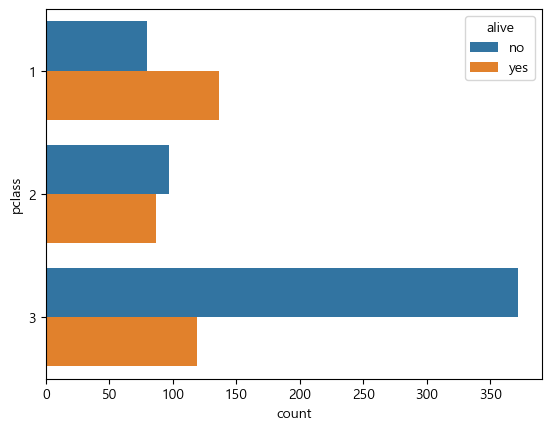

In [33]:
# hue = column : 두 개의 요소를 고려하고 싶은 경우 사용
sns.countplot(data = titanic, y = 'pclass', hue = 'alive')
plt.show()

### 2) boxplot

- 각 분포의 실제 데이터나 전체 형상을 보여줌

```python
>>> sns.boxplot(x)
>>> sns.boxplot(data)
```

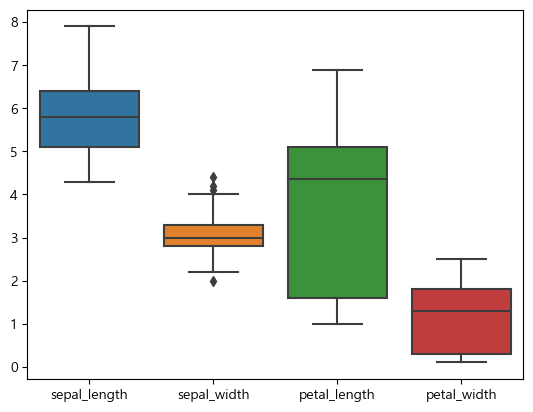

In [34]:
sns.boxplot(data = iris)
plt.show()

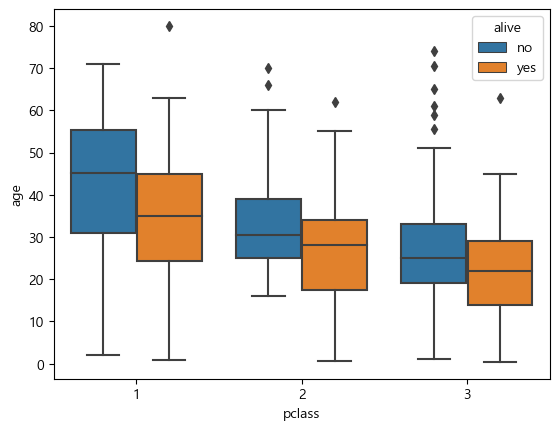

In [35]:
sns.boxplot(data = titanic, x = 'pclass', y = 'age', hue = 'alive')
plt.show()

### 3) violinplot

- boxplot과 커널 밀도 곡선을 합한 형태
- 각 분포의 실제 데이터나 전체 형상을 보여줌

```python
>>> sns.violinplot(x)
>>> sns.violinplot(data)
```

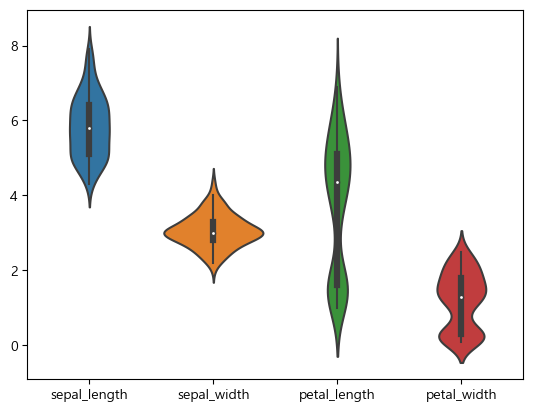

In [36]:
sns.violinplot(data = iris)
plt.show()

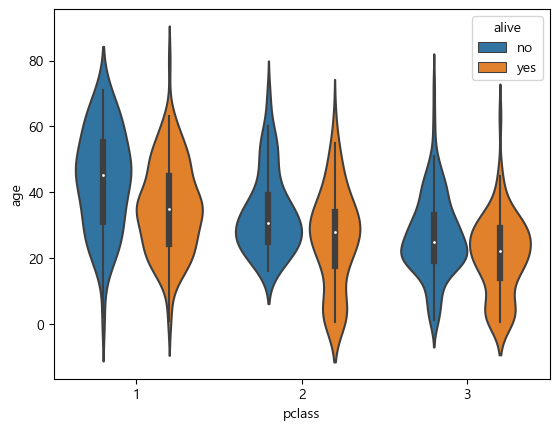

In [37]:
sns.violinplot(data = titanic, x = 'pclass', y = 'age', hue = 'alive')
plt.show()

### 4) lmplot

- column 간의 선형관계를 확인할 때 사용
- scatter plot + 추세선

```python
>>> sns.lmplot(x, y)
```

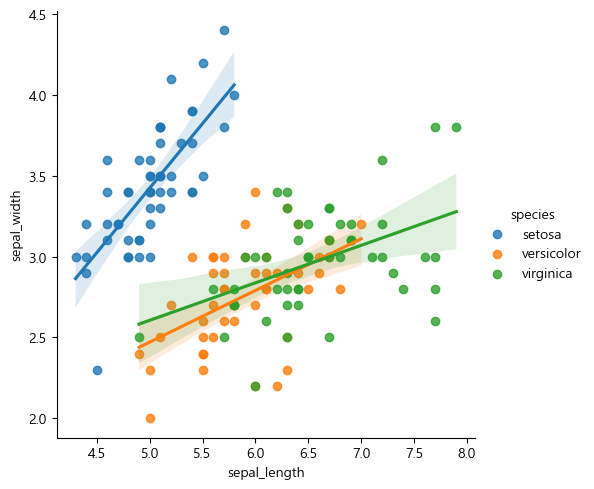

In [38]:
# fit_reg = True : 추세선
sns.lmplot(data = iris, x = 'sepal_length', y = 'sepal_width', hue = 'species', fit_reg = True)
plt.show()

### 5) pairplot

- 다차원 실수형 데이터 간의 상관관계
- 같은 컬럼 부분(대각선)에는 hist
- 각 컬럼 조합 부분에는 scatter

```python
>>> sns.pairplot(data)
```

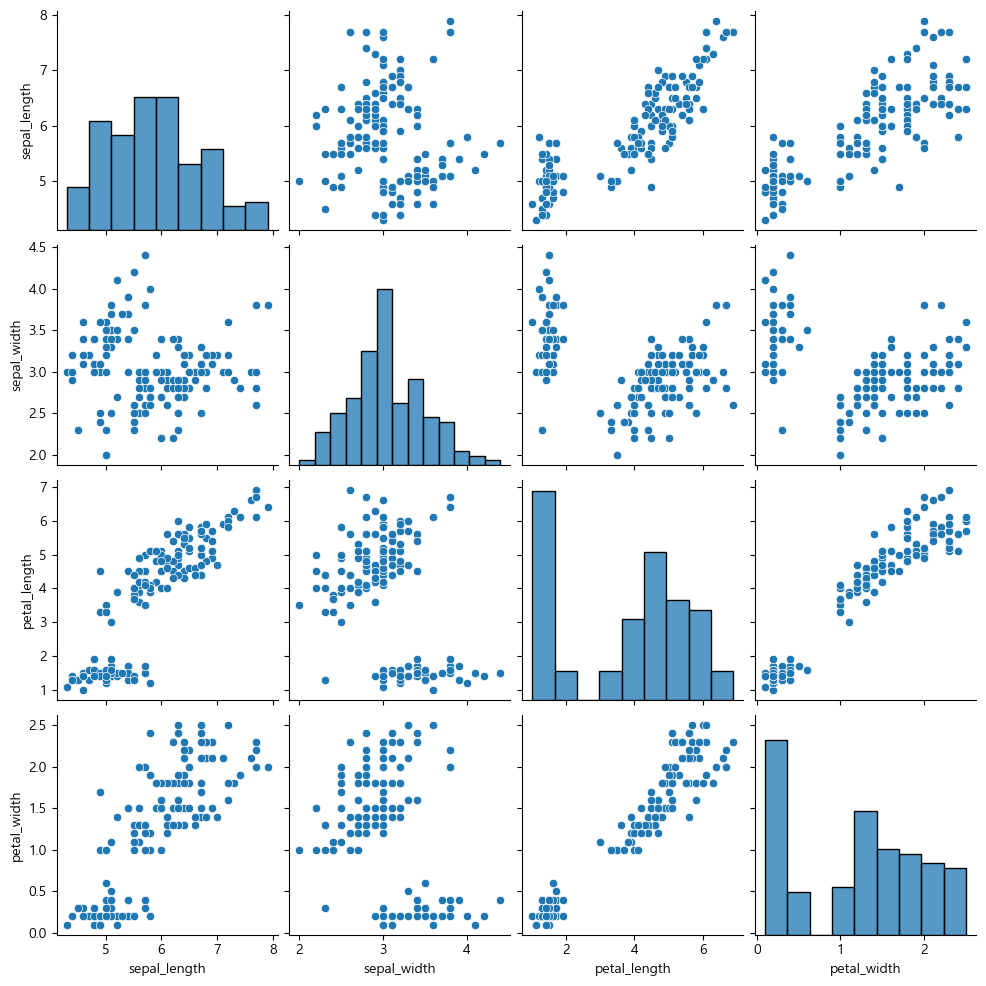

In [39]:
sns.pairplot(data = iris)
#sns.pairplot(data = iris, hue = 'species')
plt.show()

### 6) heatmap

- 변수 간의 상관관계를 확인하고 싶을 때 사용
- 색으로 표현 

```python
>>> sns.heatmap(x)
```

In [40]:
numeric_data = titanic.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
correlation_matrix

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


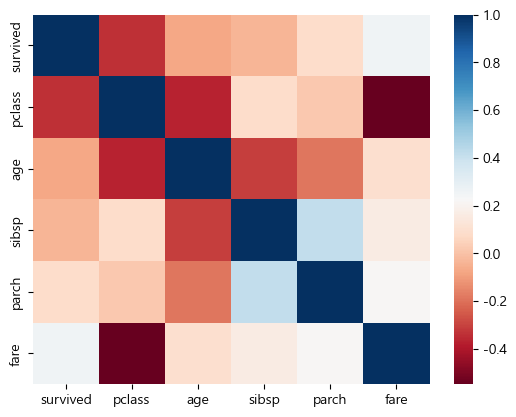

In [41]:
sns.heatmap(correlation_matrix, cmap = 'RdBu')
plt.show()

In [42]:
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

### 그래프 꾸미기

- 스타일 지정을 위한 color palette를 지원
- matplotlib의 colormap으로 사용할 수도 있음

```python
# sns.color_palette('팔레트_이름', 개수)
>>> sns.color_palette('palette', n)
```
https://seaborn.pydata.org/tutorial/color_palettes.html

<img align='left' src="https://hleecaster.com/wp-content/uploads/2019/12/article2_image9.png">

#### Qualitative
- 고유한 색상들로 이루어짐
- 범주형 데이터

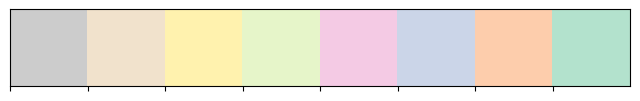

In [43]:
qualitative = sns.color_palette("Pastel2_r", 8)
sns.palplot(qualitative)

#### Diverging
- 양 끝 색이 강조되도록 이루어짐
- 높고 낮음을 표시해야 하는 데이터

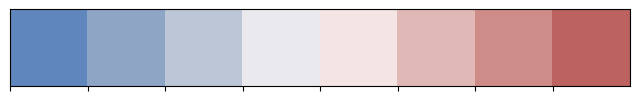

In [44]:
diverging = sns.color_palette('vlag', 8)
sns.palplot(diverging)

#### Sequential
- 밝은 색부터 어두운 색까지 차례대로 이루어짐
- 순서가 있는 데이터

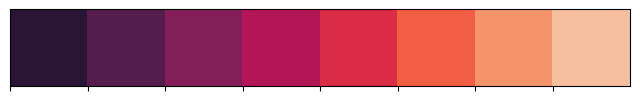

In [45]:
sequential = sns.color_palette('rocket', 8)
sns.palplot(sequential)

# 2024 Basic Session 6주차 과제

1. EDA Competition 데이터를 이용해서 5개 이상 시각화 해보기 (라이브러리, 종류 무관)
- ipynb 파일에 자유 양식으로 작성

2. EDA Competiton 기획서 작성하기